Messwerte: 181


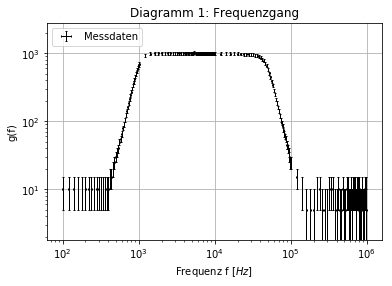

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Alle Messwerte

#Messdaten laden
f, U_aus = np.loadtxt('data/Messung_243.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f * 0.01
fehler_U_aus = np.zeros(U_aus.size) + 0.001
U_ein = 0.2
fehler_U_ein = 0.01

#g berechnen
D = 1e-3
fehler_D = D*0.002
g = U_aus/(D*U_ein)
fehler_g = np.sqrt((fehler_U_aus/U_aus)**2+(fehler_D/D)**2+(fehler_U_ein/U_ein)**2)*g

#darzustellende Daten
x = f
y = g
delta_x = fehler_f
delta_y = fehler_g

#Plot-Umgebung
x_fit = [min(x), max(x)]
fit = [min(y)/2, max(y)*2]

#Plot
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 1: '+'Frequenzgang')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, lw=0)
plt.xlabel('Frequenz '+r'f'+' '+r'${[Hz]}$')
plt.ylabel('g(f)')
plt.legend(loc='best')

#Output
plt.savefig('figures/243_Diagramm1.pdf', format='pdf')

print('Messwerte:', x.size)

Messwerte: 119


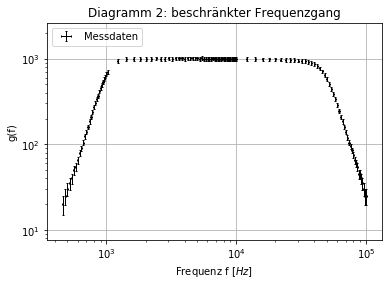

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Ausgewählte Messwerte

#Messdaten laden
f, U_aus = np.loadtxt('data/Messung_243.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f * 0.01
fehler_U_aus = np.zeros(U_aus.size) + 0.001
U_ein = 0.2
fehler_U_ein = 0.01

#g berechnen
D = 1e-3
fehler_D = D*0.002
g = U_aus/(D*U_ein)
fehler_g = np.sqrt((fehler_U_aus/U_aus)**2+(fehler_D/D)**2+(fehler_U_ein/U_ein)**2)*g

#darzustellende Daten
start = 18
cut = 44
x = f[start:-cut]
y = g[start:-cut]
delta_x = fehler_f[start:-cut]
delta_y = fehler_g[start:-cut]

#Plot-Umgebung
x_fit = [min(x), max(x)]
fit = [min(y)/2, max(y)*2]

#Plot
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 2: '+'beschränkter Frequenzgang')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, lw=0)
plt.xlabel('Frequenz '+r'f'+' '+r'${[Hz]}$')
plt.ylabel('g(f)')
plt.legend(loc='best')

#Output
plt.savefig('figures/243_Diagramm2.pdf', format='pdf')

print('Messwerte:', x.size)

V = 992.8523543100293 , Standardfehler = 2.0334954513776275
W_1 = 1028.1756438565026 , Standardfehler = 2.1857346305407037
W_2 = 46446.40050240076 , Standardfehler = 109.98114302861434
n_1 = 5.007488236788535 , Standardfehler = 0.030234707277666105
n_2 = 4.747109449353809 , Standardfehler = 0.026678731079397965


B, das Integral von 460.0 Hz < f < 120020.0 Hz beträgt [Hz]: 4.5599e+10


Chi-Quadrat = 10.97372995915673
Freiheitsgrade = 114
Chi-Quadrat reduziert = 0.0962607891154099
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 100 %


Messwerte: 119


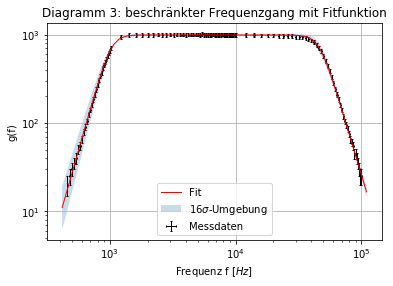

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Fitfunktion an Ausgewählte Messwerte

#Messdaten laden
f, U_aus = np.loadtxt('data/Messung_243.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f * 1e-2
fehler_U_aus = np.zeros(U_aus.size) + 1e-3

U_ein = 0.2
fehler_U_ein = 1e-2

#g berechnen
D = 1e-3
fehler_D = D*0.002
g = U_aus/(D*U_ein)
fehler_g = np.sqrt((fehler_U_aus/U_aus)**2+(fehler_D/D)**2+(fehler_U_ein/U_ein)**2)*g

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    V, W1, W2, n1, n2 = p
    return V/(np.sqrt(1+1/(x/W1)**(2*n1))*np.sqrt(1+(x/W2)**(2*n2)))

model = odr.Model(fit_func)

#darzustellende Daten
start = 18
cut = 44
x = f[start:-cut]
y = g[start:-cut]
delta_x = fehler_f[start:-cut]
delta_y = fehler_g[start:-cut]

#Startparameter
para0 = [1000, 1000, 50000, 5, 5]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0)
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 16 #um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)/1.1, max(x)*1.1, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)
                                              
#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 3: '+'beschränkter Frequenzgang mit Fitfunktion')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
plt.xlabel('Frequenz '+r'f'+' '+r'${[Hz]}$')
plt.ylabel('g(f)')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Integral berechnen
import scipy.integrate as integra

def fit_func_square(x, p):
    return fit_func(p, x)**2

B = integra.quad(fit_func_square, f[start], f[-cut], args=popt)

#Output
plt.savefig('figures/243_Diagramm3.pdf', format='pdf')

print('V =',  popt[0], ', Standardfehler =', perr[0])
print('W_1 =', popt[1], ', Standardfehler =', perr[1])
print('W_2 =', popt[2], ', Standardfehler =', perr[2])
print('n_1 =', popt[3], ', Standardfehler =', perr[3])
print('n_2 =', popt[4], ', Standardfehler =', perr[4])
print('\n')
print('B, das Integral von', f[start], 'Hz < f <', f[-cut], 'Hz beträgt [Hz]: {value:.4e}'.format(value=B[0]))
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')
print('\n')
print('Messwerte:', x.size)

c [mV^2/Ohm] = 0.0007919122191811136 , Standardfehler = 1.6393560658893678e-06


Chi-Quadrat = 1.665408948196807
Freiheitsgrade = 5
Chi-Quadrat reduziert = 0.3330817896393614
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 89 %


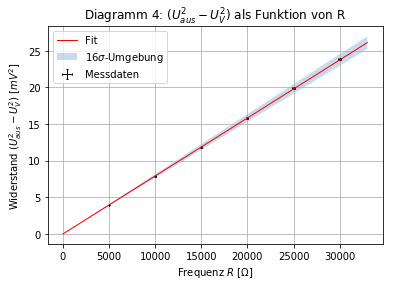

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Bestimmung der Boltzmannkonstante

#Messdaten laden
f, U_aus = np.loadtxt('data/Messung_243.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f*1e-2
fehler_U_aus = np.zeros(U_aus.size)+1e-3

U_ein = 0.2
fehler_U_ein = 0.01

#Messwerte aus Tabelle 1: U__aus über R
R = np.array([5e3, 10e3, 15e3, 20e3, 25e3, 30e3])
fehler_R = R*0.5e-2

U_aus = np.array([2.4268, 3.1345, 3.7103, 4.2153, 4.6703, 5.0869])
fehler_U_aus = U_aus*0.3e-2

U_V = 1.394
fehler_U_V = U_V*0.3e-2

d = U_aus**2-U_V**2
fehler_d = np.sqrt((2*U_aus*fehler_U_aus)**2+(2*U_V*fehler_U_V)**2)

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (a) = p
    return a*x

model = odr.Model(fit_func)

#darzustellende Daten
x = R
y = d
delta_x = fehler_R
delta_y = fehler_d

#Startparameter
para0 = [1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0)
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 16 #um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(0, max(x)*1.1, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 4: '+r'${({U^2_{aus}}-{U^2_{V}})}$'+' als Funktion von '+r'R')
plt.grid(True)
plt.xlabel('Frequenz '+r'${R}$'+' '+r'${[\Omega]}$')
plt.ylabel('Widerstand '+r'${({U^2_{aus}}-{U^2_{V}})}$'+' '+r'${[m{V^2}]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Output
plt.savefig('figures/243_Diagramm4.pdf', format='pdf')

print('c [mV^2/Ohm] =', popt[0], ', Standardfehler =', perr[0])
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')